Sentiment Analysis using Python


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [29]:
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator

In [30]:
data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")

In [31]:
print(data.head(10))

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
5  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
6  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
7  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
8  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
9  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  
5  Am

In [32]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


Clean and prepare column containing reviews bold text

In [33]:
import nltk
import re
p=nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
stemmer=nltk.SnowballStemmer("english")

In [35]:
from nltk.corpus import stopwords

In [36]:
import string

In [37]:
stopword=set(stopwords.words('english'))

In [38]:
print(stopword)

{'are', 'some', "doesn't", "wouldn't", 'didn', 'when', 'haven', "weren't", 'under', 'not', 'wasn', "mightn't", 'through', 'up', 'too', 'been', 'a', "isn't", 'before', 'from', "didn't", 've', 'me', 'their', "won't", 'we', 'these', "needn't", "you'd", 'd', 'most', 'with', 'there', 'were', 'few', 'for', 'll', 'has', 'just', 'at', 'no', 'being', 'by', 'himself', 'any', 'why', 'having', 'between', 'further', 'an', "aren't", 're', "shan't", 'him', 'but', 'her', 'above', 'ma', 'aren', 'until', 'then', 'doesn', 'into', "she's", 'once', "don't", 'should', 'again', 'and', 'i', 'my', 'or', 'am', 'yourself', 'what', 'had', 'same', 'own', 'does', 'ain', 'during', 'off', 'is', 'other', 'he', 'only', 'while', 'won', 'after', 'this', 's', 'its', 'which', 'do', 'below', 'that', 'about', 'whom', 'of', 'against', 'them', 'more', "shouldn't", 'be', 'the', "couldn't", 'itself', "should've", 'ourselves', 'doing', 'm', 'yours', 'myself', 'if', 'your', 'did', 'because', 'both', 'now', "you're", 'ours', 'nor',

In [39]:
def clean(text):
    text=str(text).lower()
    text=re.sub('\[.*? \ ]','',text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data["Review"]=data["Review"].apply(clean)

In [40]:
print(data["Review"])

0       best  great performancei got around  backup bi...
1                                             good perfom
2       great perform usual also game laptop issu batt...
3                             wife happi best product 👌🏻😘
4       light weight laptop new amaz featur batteri li...
                              ...                        
2299                great display accur colour price rang
2300    superb monitor first brought  use  month bough...
2301                                               awesom
2302                                       one issu adapt
2303    worth money u spend monitor great deal use cct...
Name: Review, Length: 2304, dtype: object


Sentiment Analysis of Flipkart Reviews bold text

In [41]:
ratings=data['Rating'].value_counts()

In [16]:
number=ratings.index
quantity=ratings.values

In [42]:
print(ratings)

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64


In [43]:
print(number)

Index([5, 4, 1, 3, 2], dtype='int64', name='Rating')


In [44]:
print(quantity)

[1382  552  184  140   46]


In [45]:
import plotly.express as px
figure=px.pie(data,values=quantity,names=number,hole=0.5)
figure.show()

In [46]:
text=" ".join(i for i in data.Review)

In [48]:
stopwords=set(STOPWORDS)

In [22]:
print(stopwords)

{'are', "doesn't", 'some', "wouldn't", "i'll", 'when', "weren't", 'not', 'under', 'through', 'up', 'too', "she'd", 'been', "we'd", "what's", 'a', "isn't", 'before', "didn't", 'from', "i'm", 'me', 'their', "won't", 'we', "i'd", 'would', 'these', "they'll", 'ought', "we'll", "you'd", 'most', 'with', 'there', 'were', 'few', 'for', 'get', "where's", 'has', 'just', 'at', "they've", 'no', 'being', 'by', 'himself', 'any', 'why', 'having', 'between', 'further', 'an', "aren't", "shan't", 'him', 'but', 'her', 'above', 'until', 'then', 'hence', 'into', "she's", 'once', "don't", 'should', 'cannot', 'again', 'and', "they'd", 'i', 'my', "they're", 'or', 'am', 'yourself', 'what', 'had', 'same', 'own', "when's", 'does', "why's", 'during', 'off', 'is', 'other', 'he', 'only', 'while', "that's", "he'll", 'after', "she'll", 'this', 'its', 'which', 'below', 'do', 'that', 'about', 'of', 'whom', 'against', 'them', 'more', 'also', "shouldn't", "i've", 'be', "couldn't", 'the', 'itself', 'doing', 'ourselves', '

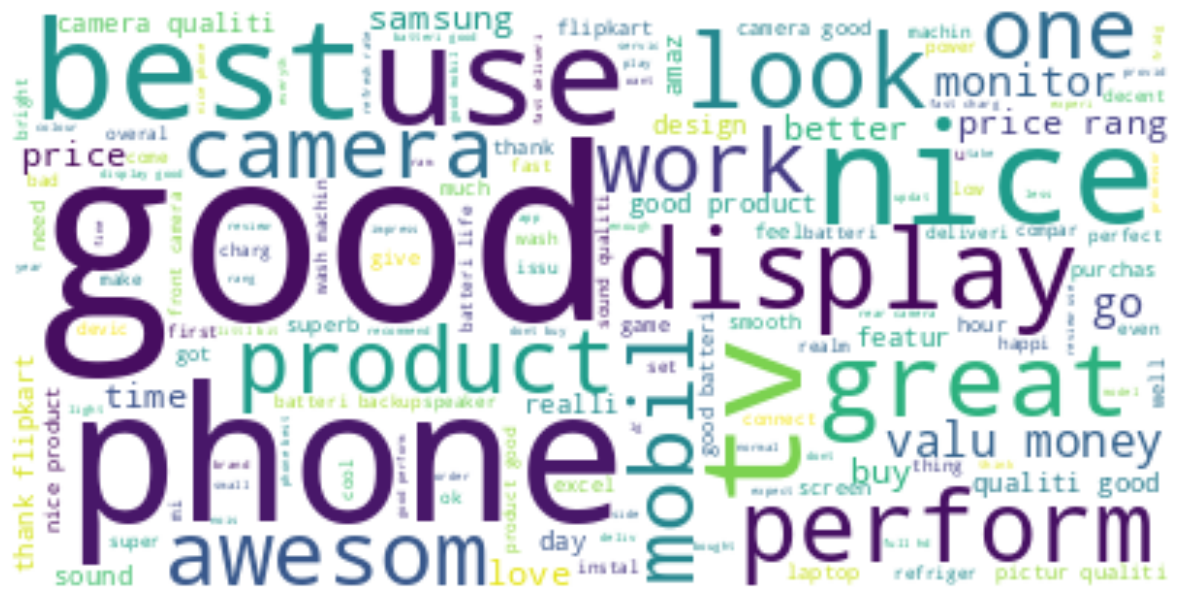

In [49]:
wordcloud=WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.figure(figsize=(15,10))

plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [51]:
!pip install nltk
import nltk
nltk.download("vader_lexicon")
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [56]:
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data[["Review","Positive","Negative","Neutral"]]
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  Positive  \
0  best  great performancei got around  backup bi...       5     0.395   
1                                        good perfom       5     0.744   
2  great perform usual also game laptop issu batt...       5     0.277   
3                        wife happi best product 👌🏻😘       5     0.512   
4  light weight laptop new amaz featur batteri li...       5     0.000   

   Negative  Neutral  
0     0.101    0.504  
1     0.000    0.256  
2     0.000    0.723  
3     0.000    0.488  
4     0.000    1.000  


60 percentage of ratings got five out five


Now lets see How most of reviewes think about product and services of Flipkart


In [57]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):

    if (a>b) and (a>c):
        print("Positive ")

    elif (b>a) and (b>c):
         print("negative")


    else:

        print("Neutral")

sentiment_score(x,y,z)











Neutral


In [59]:
print("Positive",x)
print("Negative",y)
print("Neutral",z)

Positive 923.5529999999985
Negative 96.77500000000013
Neutral 1283.6880000000006
